In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import the ML libs
import sklearn
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')


print("scikit-learn version:", sklearn.__version__)    
print("pandas version:", pd.__version__)            
print("seaborn version:", sns.__version__)  
print("matplotlib version:", matplotlib.__version__) 

scikit-learn version: 0.24.1
pandas version: 1.2.4
seaborn version: 0.11.1
matplotlib version: 3.4.1


#### Data understanding

##### Exploratory Data Analysis

The datasets are downloaded from [Kaggle Job applicants](https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource). Below I am reading the dataset as a Pandas' dataframe and print its shape(number of rows and columns)

In [2]:
df = pd.read_csv("JobPosting.csv", index_col=0)
print(df.shape)

(73462, 14)


Viewing 10 random rows from the dataframe

In [3]:
df.sample(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
57894,<35,No,Undergraduate,1,Man,Yes,Dev,8,3,Canada,74961.0,C++;Go;Python;Docker;Homebrew;Kubernetes;npm;A...,13,0
36573,<35,No,Master,1,Woman,No,Dev,3,2,France,37834.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;PHP;Pyt...,13,1
8262,>35,No,Undergraduate,1,Man,Yes,Dev,36,23,Belgium,87992.0,Java;JavaScript;Git;React.js;Spring;MongoDB,6,0
60188,<35,No,Other,1,Man,No,NotDev,11,7,Russian Federation,83124.0,Python;SQL;Docker;Homebrew;Django;Google Cloud...,11,0
46149,<35,No,Undergraduate,1,Man,Yes,Dev,5,3,Israel,140496.0,Bash/Shell;Go;Java;Python;Scala;SQL;Docker;Hom...,18,1
29841,<35,No,Undergraduate,1,Man,Yes,Dev,6,3,Brazil,12372.0,HTML/CSS;PHP;SQL;Docker;Git;Unity 3D;jQuery;La...,13,0
58913,<35,No,Undergraduate,1,Man,No,Dev,8,1,United States of America,75000.0,C#;HTML/CSS;JavaScript;PowerShell;Python;SQL;V...,13,1
32085,<35,No,Undergraduate,1,Man,Yes,Dev,6,2,Canada,49160.0,Go;HTML/CSS;Java;JavaScript;Node.js;SQL;TypeSc...,19,1
72435,>35,No,Undergraduate,1,Man,No,NotDev,30,22,Australia,88464.0,Bash/Shell;Python;Ansible;Docker;Kubernetes;AWS,6,0
33454,>35,No,Other,1,Man,No,Dev,24,15,Italy,30267.0,HTML/CSS;JavaScript;PHP;SQL;Git;Symfony;Micros...,8,0


Here I am globally looking at the data. I did that by printing the data info.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 8.4+ MB


From the result above We can see that non-null for the column `HaveWorkedWith` are less than rest of the columns.
Below we are looking at the number of rows where the column has null values.

In [5]:
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

Checking duplicate rows in the dataset

In [6]:
df[df.duplicated(keep=False)]

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
3134,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
6652,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
6664,>35,No,Master,0,Man,No,Dev,25,15,Italy,129718.0,Go;Java;JavaScript;Kotlin;Node.js;Rust;TypeScr...,16,1
7280,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7329,<35,No,Undergraduate,1,Man,No,Dev,4,0,India,2653.0,Java;Python;Docker;Git;Kubernetes;Flask;Spring...,10,0
7783,>35,No,Undergraduate,1,Man,No,Dev,39,27,Croatia,26124.0,SQL;Oracle,2,0
45964,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1
46025,<35,No,Undergraduate,1,Man,No,Dev,17,10,Finland,44796.0,C#;Java;Python;Ansible;Docker;Unity 3D;Microso...,10,1


Droping rows with null values together with duplicated rows

In [7]:
df.dropna(inplace=True)

In [8]:
df=df.drop_duplicates(keep='first', ignore_index=True)

In [9]:
df.shape

(73395, 14)

 #### Modelling
 
 
In this step only the train set is used to fit the model, which in this case uses KNeighborsClassifier algorithm for classification from Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

Assigning feature and target to variables

In [10]:
X = df.drop(['Employed'],axis=1)
y = df['Employed']

#### Using TF-IDF as a text tokenizer and vectorizer

The goal of using tf-idf is that it not only focuses on the frequency of words present in a text, but also provides the weight of the words. Sklearn.feature_extraction.text.TfidFVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.t

In [11]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(df['HaveWorkedWith']).toarray()
tf_X_vectorized.shape

(73395, 100)

Make a dataframe of the vectorized data and view the result

In [12]:
X = pd.DataFrame(tf_X_vectorized)
X['HaveWorkedWith'] = df["HaveWorkedWith"].values
y = df['Employed']
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,HaveWorkedWith
43324,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.337344,0.389447,0.000000,0.0,0.0,0.000000,HTML/CSS;Java;JavaScript;PHP;Python;SQL;VBA;np...
23426,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,C;Ruby;Git
60373,0.0,0.000000,0.0,0.45535,0.0,0.162945,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,C#;HTML/CSS;JavaScript;Python;npm;ASP.NET;ASP....
14620,0.0,0.479453,0.0,0.00000,0.0,0.179255,0.0,0.000000,0.0,0.0,...,0.192624,0.0,0.0,0.000000,0.000000,0.275337,0.0,0.0,0.000000,HTML/CSS;JavaScript;Node.js;TypeScript;Git;Ang...
51967,0.0,0.291377,0.0,0.00000,0.0,0.217876,0.0,0.261023,0.0,0.0,...,0.234126,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.303551,Bash/Shell;HTML/CSS;JavaScript;SQL;TypeScript;...


Splitting train and test data. Train data takes 80% and Test 20%

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 73395 observations, of which 58716 are now in the train set, and 14679 in the test set.


In [14]:
X_train = X_train.drop(['HaveWorkedWith'], axis=1)
X_HaveWorkedWith_text = X_test['HaveWorkedWith']
X_test = X_test.drop(['HaveWorkedWith'], axis=1)

Running the model with KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8630696913958716


Using KNN with Tfid FVectorizer we are getting an accuracy of 86%. We can run our model on train and test data and compare their classification results and check if this performance is not an overfitting or underfitting.

We can see a difference of 5% on training and test data accuracy, so we can say that there is a slight overfitting. Next we will perform hyperparameters tuning and see if the performance will improve.

In [16]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     27246
           1       0.93      0.91      0.92     31470

    accuracy                           0.91     58716
   macro avg       0.91      0.91      0.91     58716
weighted avg       0.91      0.91      0.91     58716

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      6759
           1       0.88      0.86      0.87      7920

    accuracy                           0.86     14679
   macro avg       0.86      0.86      0.86     14679
weighted avg       0.86      0.86      0.86     14679



In the above model we used default values of hyperparameters, for example n_neighbors (K) is 5 by default.

Let's search an optimal K value which will improve our model with less error rate. We are going to run the KNeighborsClassifier model with K values in range 1 to 10 and visualize in a plot to see which K will produce minimal error rate.

Minimum error:  0.13182096873083998 at K = 9


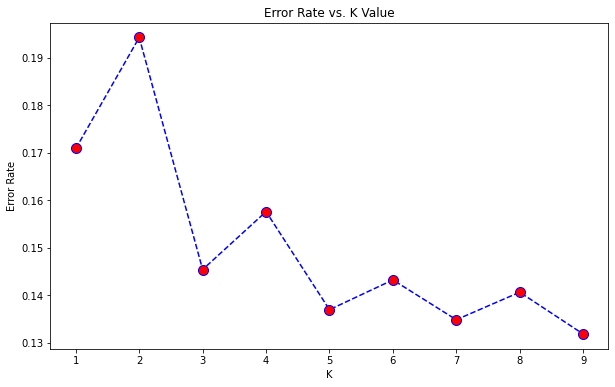

In [17]:
from sklearn import metrics
acc=[]
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

We find that at K=9 the model produces the lowest error rate of 0.13, and we are validating this by plotting the accuracy against K values and got the best accuracy of 86,8% when K=9

Maximum accuracy:  0.8681790312691601 at K = 9


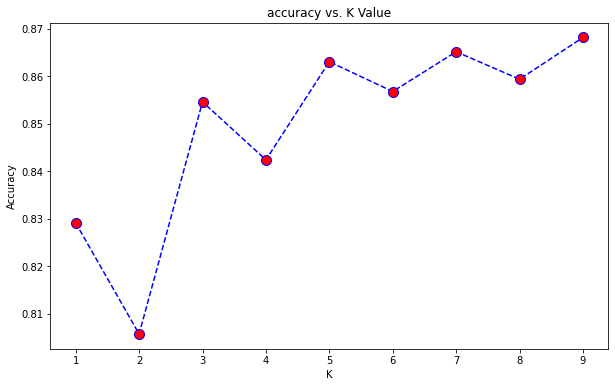

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

Use the optimal K value of 9 and the model scored 86,8%

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8681790312691601


We can now see that the model's performance slight improved by 0.08%

In [21]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     27246
           1       0.91      0.89      0.90     31470

    accuracy                           0.90     58716
   macro avg       0.90      0.90      0.90     58716
weighted avg       0.90      0.90      0.90     58716

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6759
           1       0.89      0.86      0.88      7920

    accuracy                           0.87     14679
   macro avg       0.87      0.87      0.87     14679
weighted avg       0.87      0.87      0.87     14679

